In [78]:
import pandas as pd
import numpy as np

In [79]:
diamonds = pd.read_csv('diamonds.csv')

In [80]:
diamonds.shape

(53940, 11)

In [81]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [82]:
diamonds.isnull().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [83]:
diamonds.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [84]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [85]:
diamonds.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [86]:
diamonds.sample(10)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
24535,24536,1.31,Ideal,F,VS1,62.1,55.0,12825,6.97,7.00,4.34
48825,48826,0.70,Good,I,SI1,58.2,61.0,2028,5.80,5.84,3.39
7749,7750,1.03,Ideal,F,SI2,61.9,56.0,4280,6.47,6.43,3.99
53650,53651,0.72,Good,F,VS2,61.1,60.0,2705,5.72,5.76,3.51
43147,43148,0.52,Very Good,E,SI1,62.7,57.0,1389,5.10,5.14,3.21
17836,17837,1.06,Ideal,H,VVS1,61.3,57.0,7193,6.55,6.53,4.01
44306,44307,0.61,Ideal,G,SI1,62.0,54.0,1579,5.48,5.50,3.40
52263,52264,0.70,Ideal,I,VS1,61.5,56.0,2490,5.73,5.76,3.53
47276,47277,0.51,Ideal,D,VS1,60.9,57.0,1845,5.20,5.17,3.16
15474,15475,1.05,Ideal,D,SI1,60.7,60.0,6196,6.52,6.56,3.97


In [87]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns

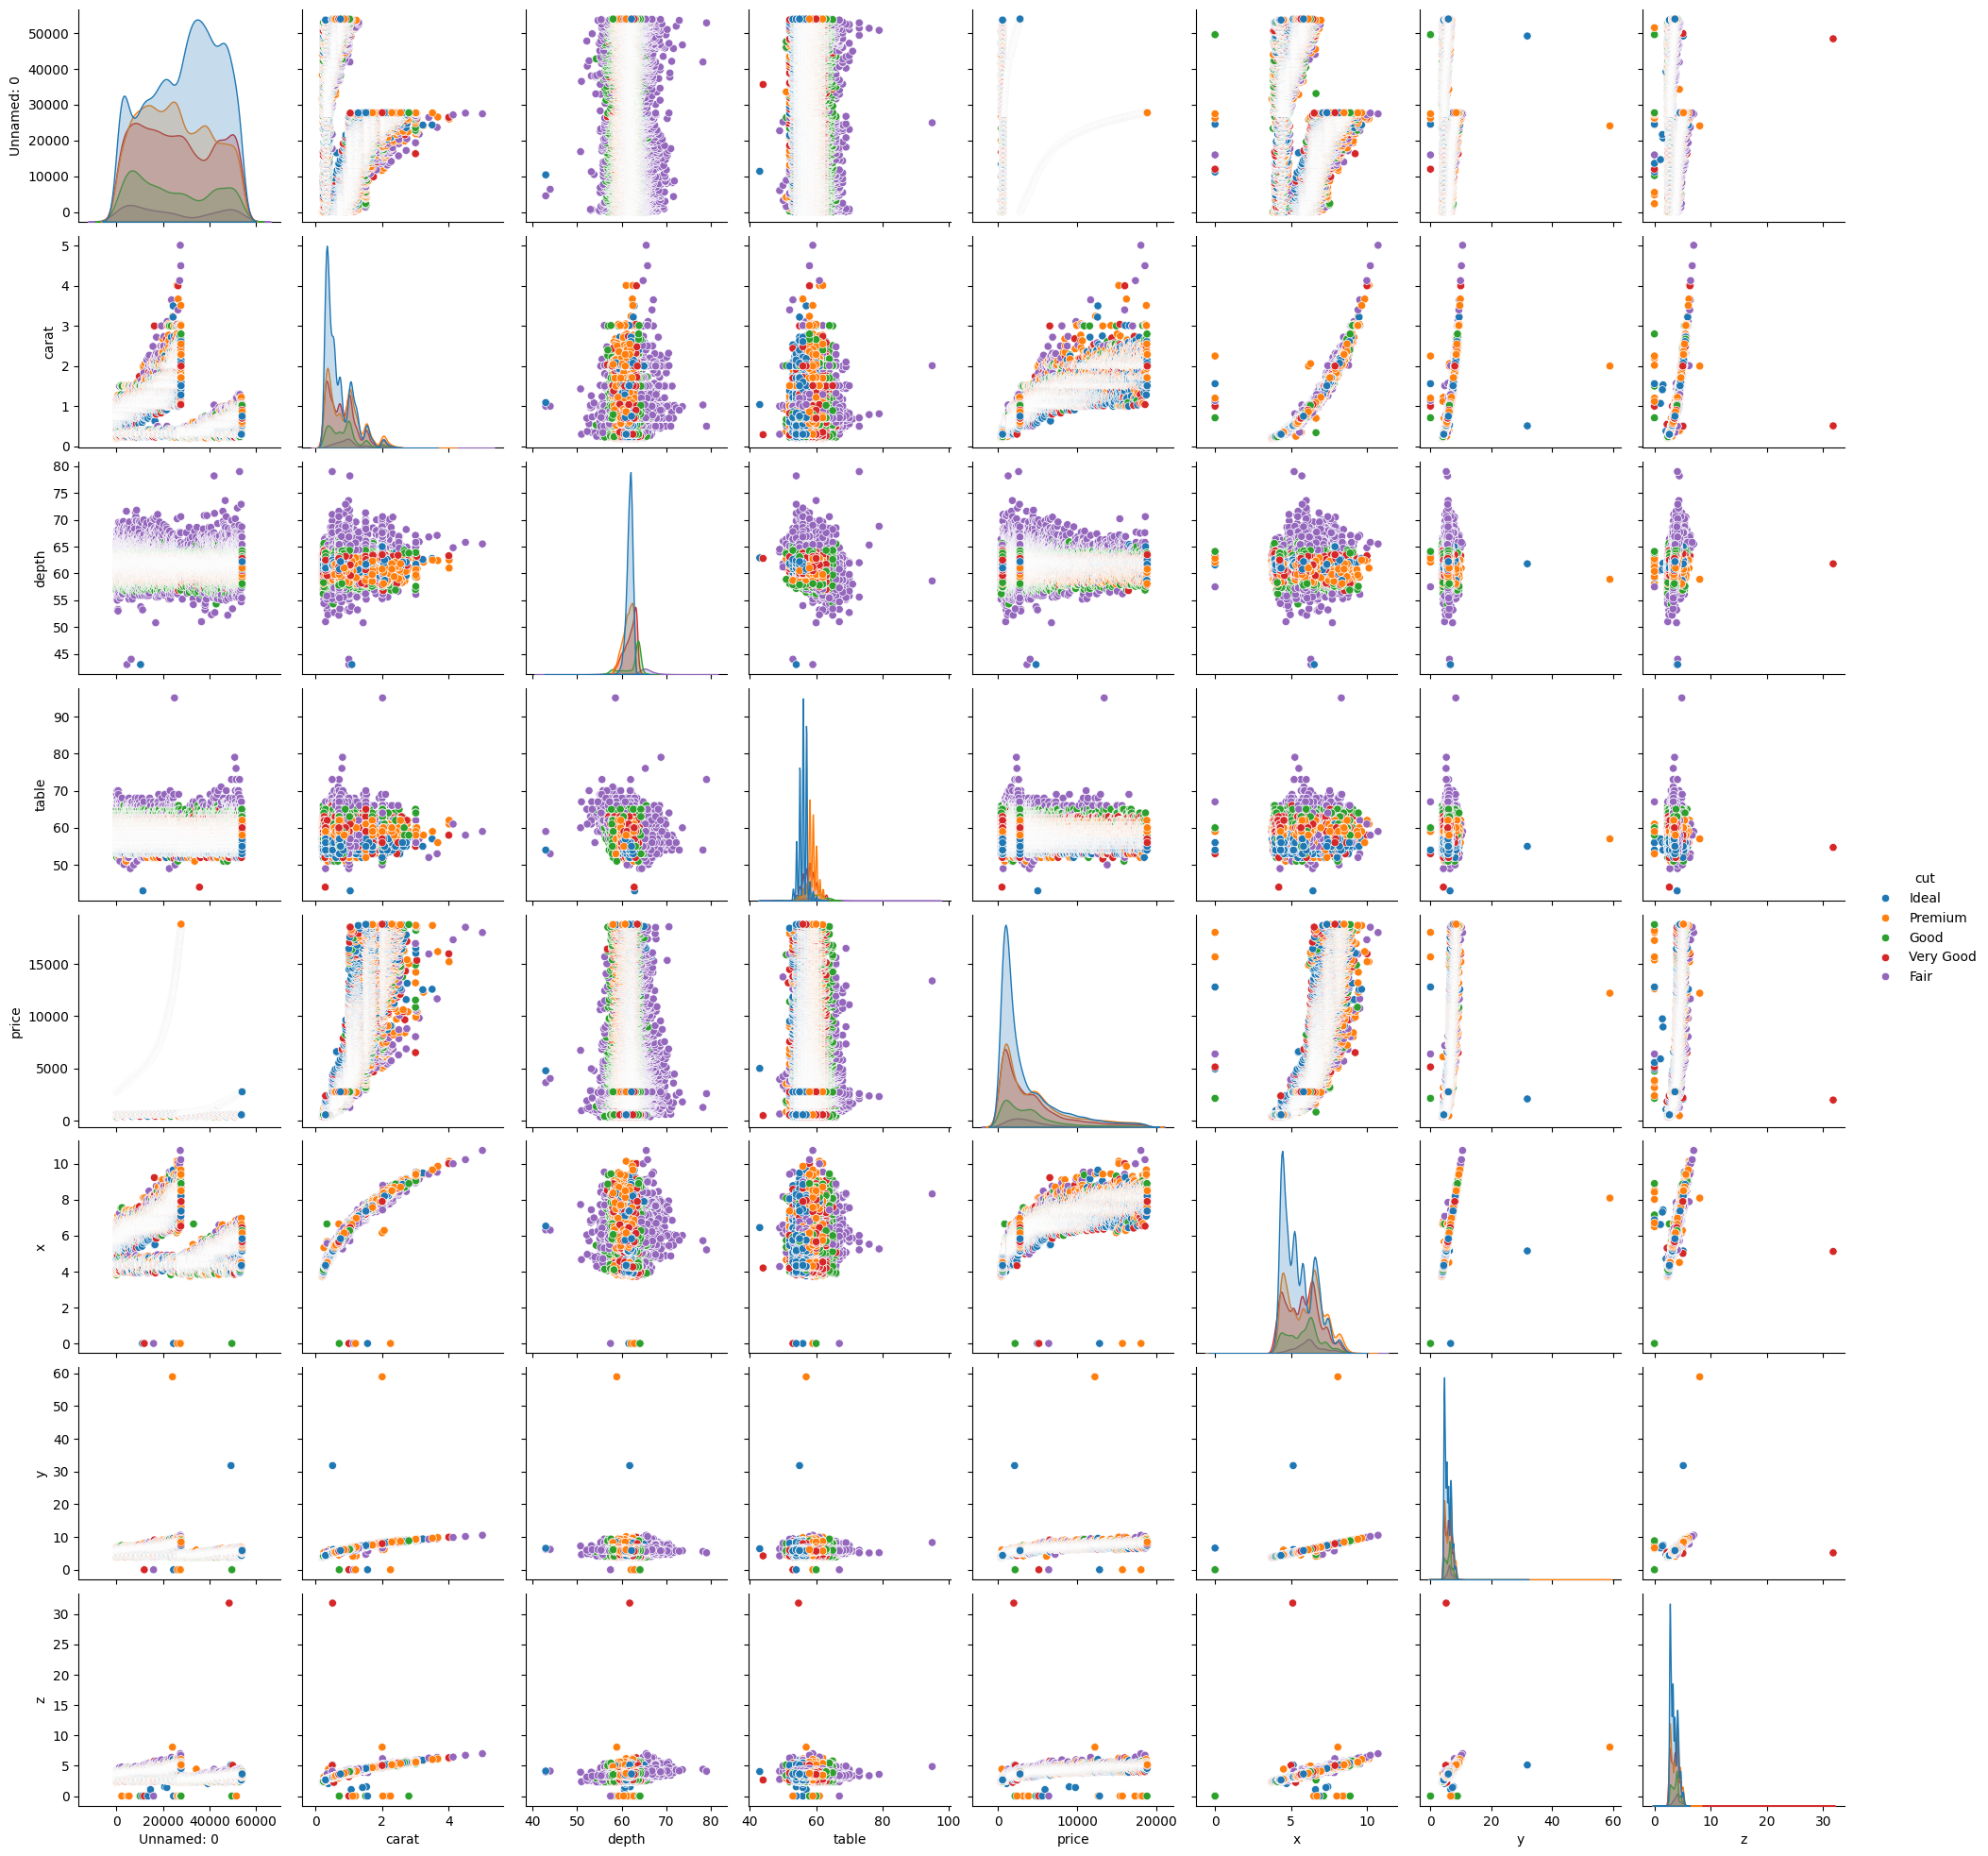

In [88]:
sns.pairplot(diamonds, hue='cut')

Text(0.5, 1.0, 'regression line price vs x')

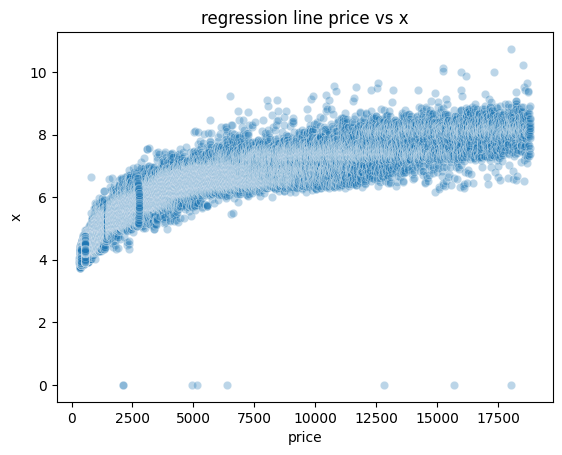

In [89]:
ax=sns.scatterplot(x="price",y="x",data=diamonds, alpha=0.3)
ax.set_title("regression line price vs x")

In [90]:
# preprocessing
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
diamonds['cut'] = le.fit_transform(diamonds['cut'])
diamonds['color'] = le.fit_transform(diamonds['color'])
diamonds['clarity'] = le.fit_transform(diamonds['clarity'])

In [91]:
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

In [92]:
# scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [93]:
# model selection
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [94]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 1776658.6220641925
R2: 0.8860961756221952


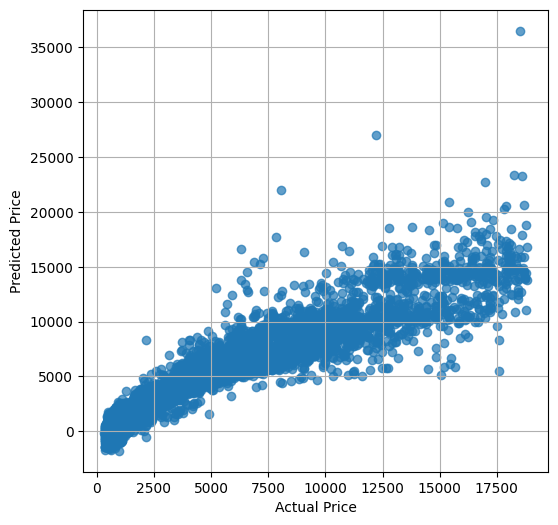

In [95]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [96]:
# laso
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 1765832.305496689
R2: 0.8867902644278043


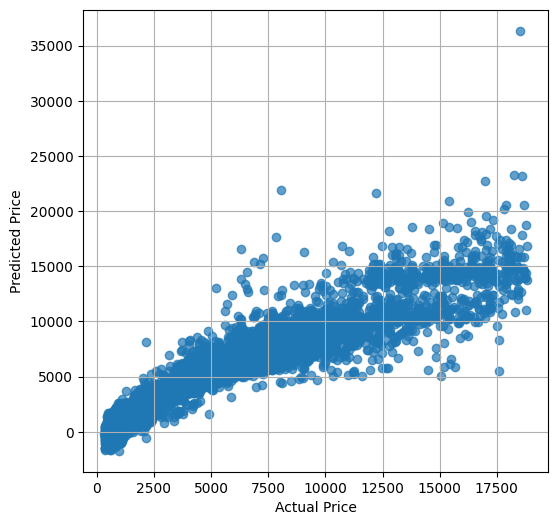

In [97]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [98]:
# ridge
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 1776418.2826077132
R2: 0.8861115840877845


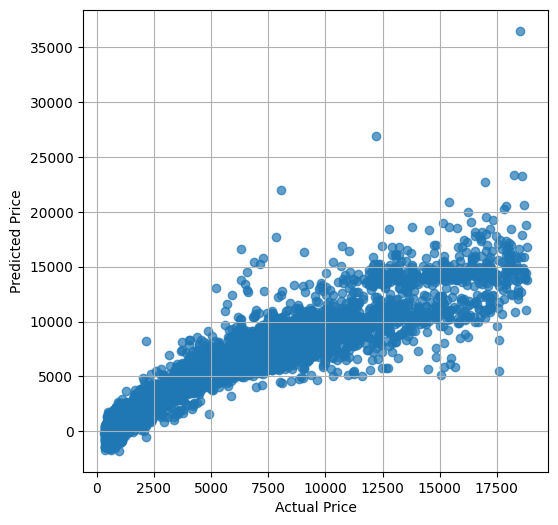

In [99]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [100]:
# polinomiyal
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

y_pre = poly_reg.predict(X_poly_test)

print('MSE:', mean_squared_error(y_test, y_pre))
print('R2:', r2_score(y_test, y_pre))

MSE: 1239622534730.826
R2: -79472.76369169899


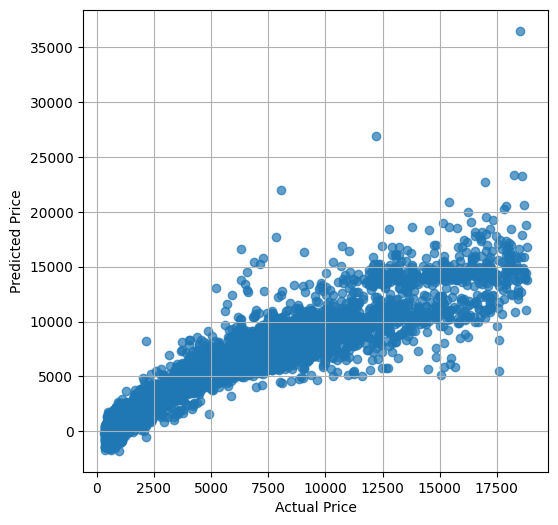

In [101]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [102]:
# knn
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 440920.544119392
R2: 0.9717320279775578


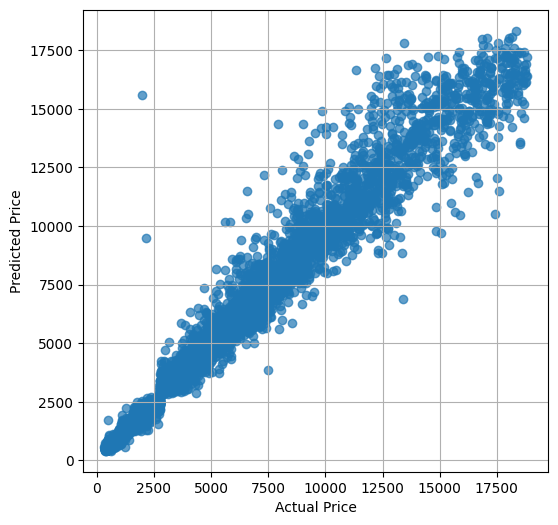

In [103]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [104]:
# svr
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 7396925.958974877
R2: 0.5257737502842245


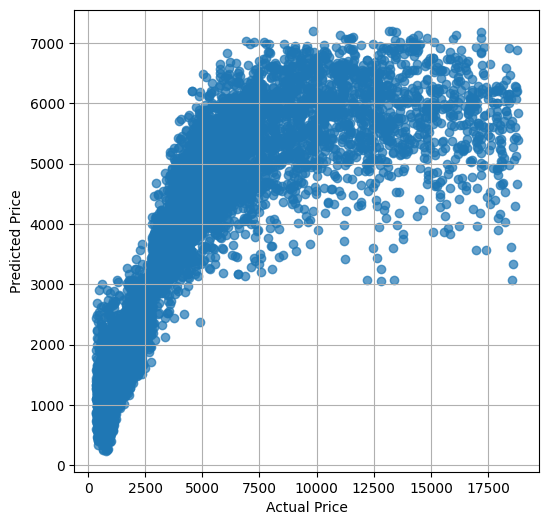

In [105]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [106]:
# random forest
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 406.8121855858362
R2: 0.999973918757849


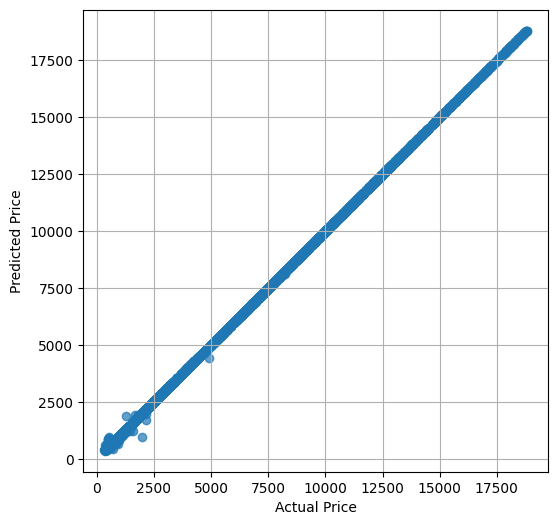

In [107]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [108]:
# grediand
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 39469.573985568495
R2: 0.9974695558461897


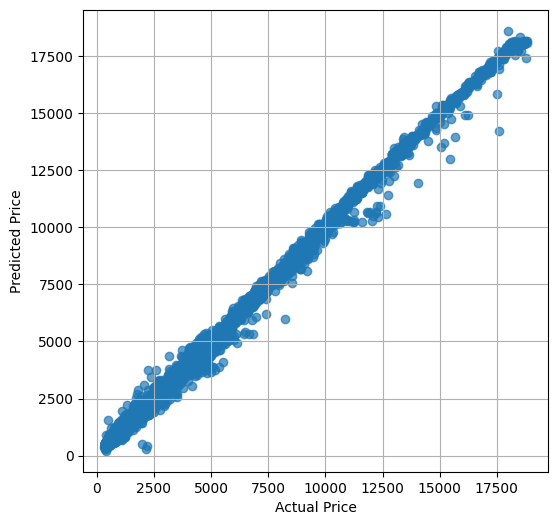

In [109]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [110]:
# dicision tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

MSE: 940.8534482758621
R2: 0.9999396806991468


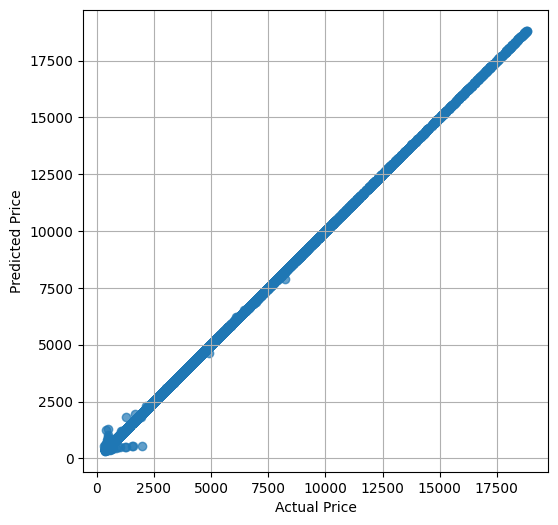

In [111]:
# Plot predictions vs actual
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.grid(True)
plt.show()

In [112]:
# model file name
models = {
    'Linear Regression = ': lr,
    'Lasso = ': lasso,
    'Ridge = ': ridge,
    'Polynomial = ': poly_reg,
    'knn': knn,
    'svr': svm,
    'Random Forest = ': rf,
    'grediand = ': gb,
    'dicision tree = ': dt

}


In [113]:
# compare model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model_name, 'MSE:', mean_squared_error(y_test, y_pred))
    print(model_name, 'R2:', r2_score(y_test, y_pred))


Linear Regression =  MSE: 1776658.6220641925
Linear Regression =  R2: 0.8860961756221952
Lasso =  MSE: 1765832.305496689
Lasso =  R2: 0.8867902644278043
Ridge =  MSE: 1776418.2826077132
Ridge =  R2: 0.8861115840877845
Polynomial =  MSE: 1776658.6220641925
Polynomial =  R2: 0.8860961756221952
knn MSE: 440920.544119392
knn R2: 0.9717320279775578
svr MSE: 7396925.958974877
svr R2: 0.5257737502842245
Random Forest =  MSE: 423.61580400444944
Random Forest =  R2: 0.9999728414566852
grediand =  MSE: 39024.00350365141
grediand =  R2: 0.9974981219315873
dicision tree =  MSE: 870.7181127178346
dicision tree =  R2: 0.9999441771639402


In [114]:
# save the model
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(dt, f)